In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- heart_disease(Framingham) - https://www.kaggle.com/datasets/aasheesh200/framingham-heart-study-dataset
- diabetes -> https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

In [3]:
df_fram = pd.read_csv("datasets_final/framingham.csv")
df_diabetes = pd.read_csv("datasets_final/diabetes1.csv")

In [4]:
df_fram

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [5]:
df_diabetes

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Male,28.0,0,0,never,27.32,5.7,158,0
2,Female,36.0,0,0,current,23.45,5.0,155,0
3,Male,76.0,1,1,current,20.14,4.8,155,0
4,Female,20.0,0,0,never,27.32,6.6,85,0
...,...,...,...,...,...,...,...,...,...
9995,Female,19.0,0,0,never,31.32,6.0,90,0
9996,Male,57.0,1,0,former,31.41,7.0,260,1
9997,Male,62.0,0,1,former,27.10,5.8,100,0
9998,Female,30.0,0,0,not current,32.89,6.6,126,1


# Data Preparation

In [7]:
df_diabetes['gender'] = df_diabetes['gender'].map({'Male': 1, 'Female': 0})
df_diabetes['smoking_history'] = df_diabetes['smoking_history'].map({'never': 0, 'current': 1, 'former': 1})


In [8]:
df_diabetes

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,80.0,0,1,0.0,25.19,6.6,140,0
1,1.0,28.0,0,0,0.0,27.32,5.7,158,0
2,0.0,36.0,0,0,1.0,23.45,5.0,155,0
3,1.0,76.0,1,1,1.0,20.14,4.8,155,0
4,0.0,20.0,0,0,0.0,27.32,6.6,85,0
...,...,...,...,...,...,...,...,...,...
9995,0.0,19.0,0,0,0.0,31.32,6.0,90,0
9996,1.0,57.0,1,0,1.0,31.41,7.0,260,1
9997,1.0,62.0,0,1,1.0,27.10,5.8,100,0
9998,0.0,30.0,0,0,NaN,32.89,6.6,126,1


## Combining the datasets on common columns

In [10]:
df_fram.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [11]:
df_diabetes.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [12]:
df_fram = df_fram[["male", "age", "prevalentHyp", "TenYearCHD", "currentSmoker" ,"BMI", "glucose", "diabetes"]]
df_fram

,male,age,prevalentHyp,TenYearCHD,currentSmoker,BMI,glucose,diabetes
0,1,39,0,0,0,26.97,77.0,0
1,0,46,0,0,0,28.73,76.0,0
2,1,48,0,0,1,25.34,70.0,0
3,0,61,1,1,1,28.58,103.0,0
4,0,46,0,0,1,23.10,85.0,0
...,...,...,...,...,...,...,...,...
4235,0,48,0,0,1,22.00,86.0,0
4236,0,44,0,0,1,19.16,NaN,0
4237,0,52,0,0,0,21.47,107.0,0
4238,1,40,1,0,0,25.60,72.0,0


In [13]:
import pandas as pd

# Renaming columns in df_fram to match df_diabetes
df_fram_renamed = df_fram.rename(columns={
    'male': 'gender',
    'age': 'age',
    'currentSmoker': 'smoking_history',
    'prevalentHyp': 'hypertension',
    'diabetes': 'diabetes',
    'BMI': 'bmi',
    'glucose': 'blood_glucose_level',
    'TenYearCHD': 'heart_disease'
})

# Concatenating the dataframes
df_combined = pd.concat([df_diabetes, df_fram_renamed], ignore_index=True)


In [14]:
df_combined = df_combined.drop("HbA1c_level", axis = 1)

In [15]:
df_combined.to_csv("merged_data.csv")

# Handling missing values

In [17]:
df_combined.isnull().sum()

gender                    1
age                       0
hypertension              0
heart_disease             0
smoking_history        1574
bmi                      19
blood_glucose_level     388
diabetes                  0
dtype: int64

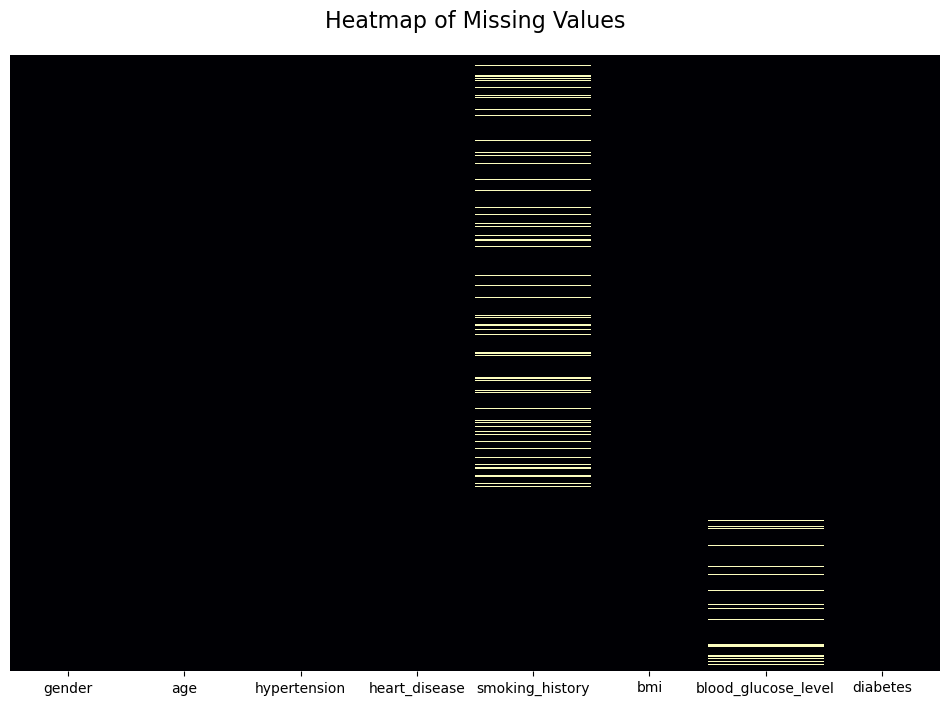

In [18]:
missing_data = df_combined.isnull()
plt.figure(figsize=(12, 8))
sns.heatmap(missing_data, cmap='magma',  cbar=False, yticklabels=False)
plt.title("Heatmap of Missing Values", fontsize=16, pad=20)
plt.show()

In [19]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

iterative_imputer = IterativeImputer(max_iter=10, random_state=0)
df_combined_imputed = pd.DataFrame(iterative_imputer.fit_transform(df_combined), columns=df_combined.columns)

In [20]:
df_combined_imputed.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
blood_glucose_level    0
diabetes               0
dtype: int64

In [21]:
df_combined = df_combined_imputed

In [22]:
df_combined

,gender,age,hypertension,heart_disease,smoking_history,bmi,blood_glucose_level,diabetes
0,0.0,80.0,0.0,1.0,0.0,25.19,140.000000,0.0
1,1.0,28.0,0.0,0.0,0.0,27.32,158.000000,0.0
2,0.0,36.0,0.0,0.0,1.0,23.45,155.000000,0.0
3,1.0,76.0,1.0,1.0,1.0,20.14,155.000000,0.0
4,0.0,20.0,0.0,0.0,0.0,27.32,85.000000,0.0
...,...,...,...,...,...,...,...,...
14235,0.0,48.0,0.0,0.0,1.0,22.00,86.000000,0.0
14236,0.0,44.0,0.0,0.0,1.0,19.16,109.877891,0.0
14237,0.0,52.0,0.0,0.0,0.0,21.47,107.000000,0.0
14238,1.0,40.0,1.0,0.0,0.0,25.60,72.000000,0.0


# Data Transformation

In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numeric_columns = ['age', 'bmi', 'blood_glucose_level']
standard_scaler = StandardScaler()
df_combined[numeric_columns] = standard_scaler.fit_transform(df_combined[numeric_columns])

# Alternative method
- min_max_scaler = MinMaxScaler()
- df_combined[numeric_columns] = min_max_scaler.fit_transform(df_combined[numeric_columns])

In [26]:
df_combined

,gender,age,hypertension,heart_disease,smoking_history,bmi,blood_glucose_level,diabetes
0,0.0,1.889322,0.0,1.0,0.0,-0.413991,0.372758,0.0
1,1.0,-1.147741,0.0,0.0,0.0,-0.059310,0.769758,0.0
2,0.0,-0.680500,0.0,0.0,1.0,-0.703730,0.703592,0.0
3,1.0,1.655702,1.0,1.0,1.0,-1.254901,0.703592,0.0
4,0.0,-1.614981,0.0,0.0,0.0,-0.059310,-0.840296,0.0
...,...,...,...,...,...,...,...,...
14235,0.0,0.020360,0.0,0.0,1.0,-0.945180,-0.818241,0.0
14236,0.0,-0.213260,0.0,0.0,1.0,-1.418088,-0.291601,0.0
14237,0.0,0.253980,0.0,0.0,0.0,-1.033434,-0.355074,0.0
14238,1.0,-0.446880,1.0,0.0,0.0,-0.345719,-1.127019,0.0


In [27]:
df_combined.dtypes

gender                 float64
age                    float64
hypertension           float64
heart_disease          float64
smoking_history        float64
bmi                    float64
blood_glucose_level    float64
diabetes               float64
dtype: object

In [28]:
columns_to_convert = ['gender', 'smoking_history', 'hypertension', 'diabetes', 'heart_disease']

# Converting columns to categorical
df_combined[columns_to_convert] = df_combined[columns_to_convert].astype('category')

# Verify the data types
print(df_combined.dtypes)

gender                 category
age                     float64
hypertension           category
heart_disease          category
smoking_history        category
bmi                     float64
blood_glucose_level     float64
diabetes               category
dtype: object


# Oulier Handling

In [30]:
def handle_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with the median value of the column
        outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
        if outliers.any():
            df.loc[outliers, col] = df[col].median()
    return df


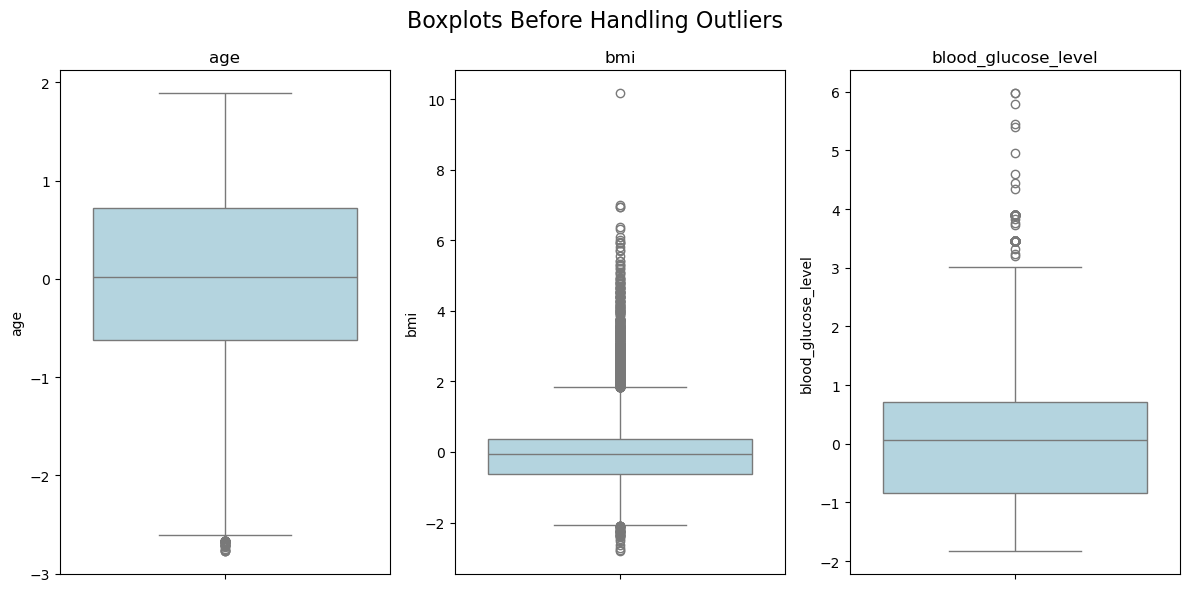

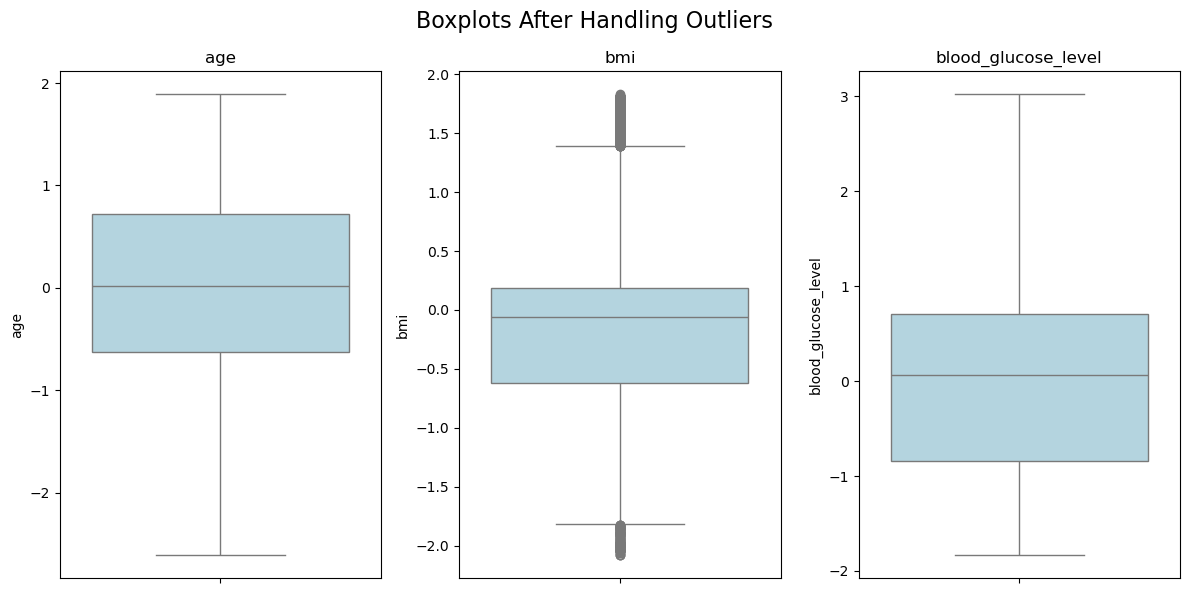

In [31]:
def plot_boxplots(df, columns, title):
    plt.figure(figsize=(12, 6))
    for i, col in enumerate(columns, 1):
        plt.subplot(1, len(columns), i)
        sns.boxplot(y=df[col], color='lightblue')
        plt.title(f'{col}')
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Columns to analyze
numeric_columns = ['age', 'bmi', 'blood_glucose_level']

# Plot before handling outliers
plot_boxplots(df_combined, numeric_columns, "Boxplots Before Handling Outliers")

# Apply the IQR method to handle outliers
df_combined = handle_outliers_iqr(df_combined, numeric_columns)

# Plot after handling outliers
plot_boxplots(df_combined, numeric_columns, "Boxplots After Handling Outliers")


# EDA

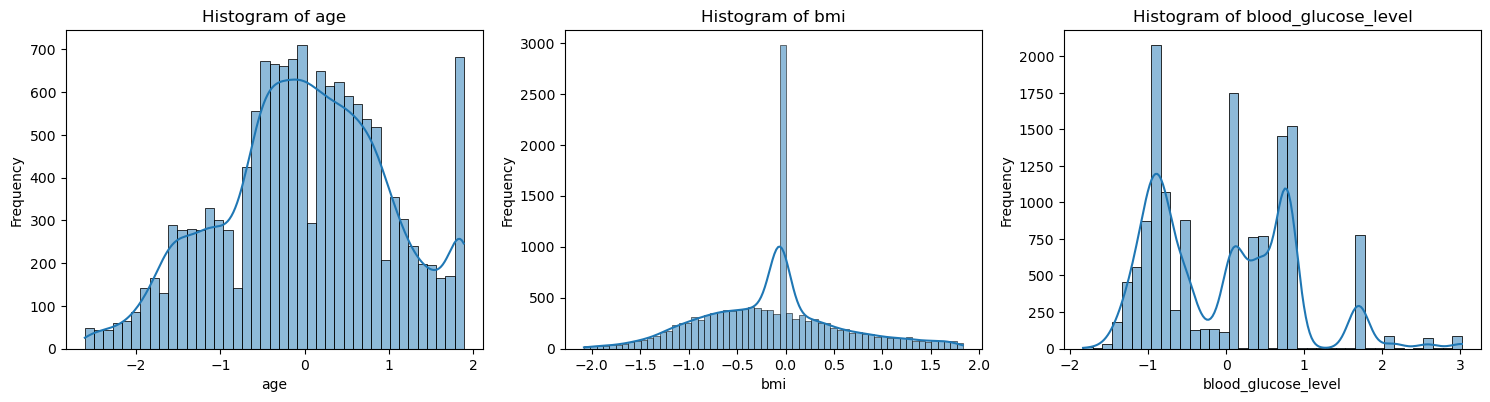

In [33]:
# Univariate Analysis for Numeric Variables
numeric_cols = df_combined.select_dtypes(include=['float64', 'int64']).columns

# Histograms and Box Plots
plt.figure(figsize=(20, 15))

for i, col in enumerate(numeric_cols):
    # Histogram
    plt.subplot(4, 4, i + 1)
    sns.histplot(df_combined[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

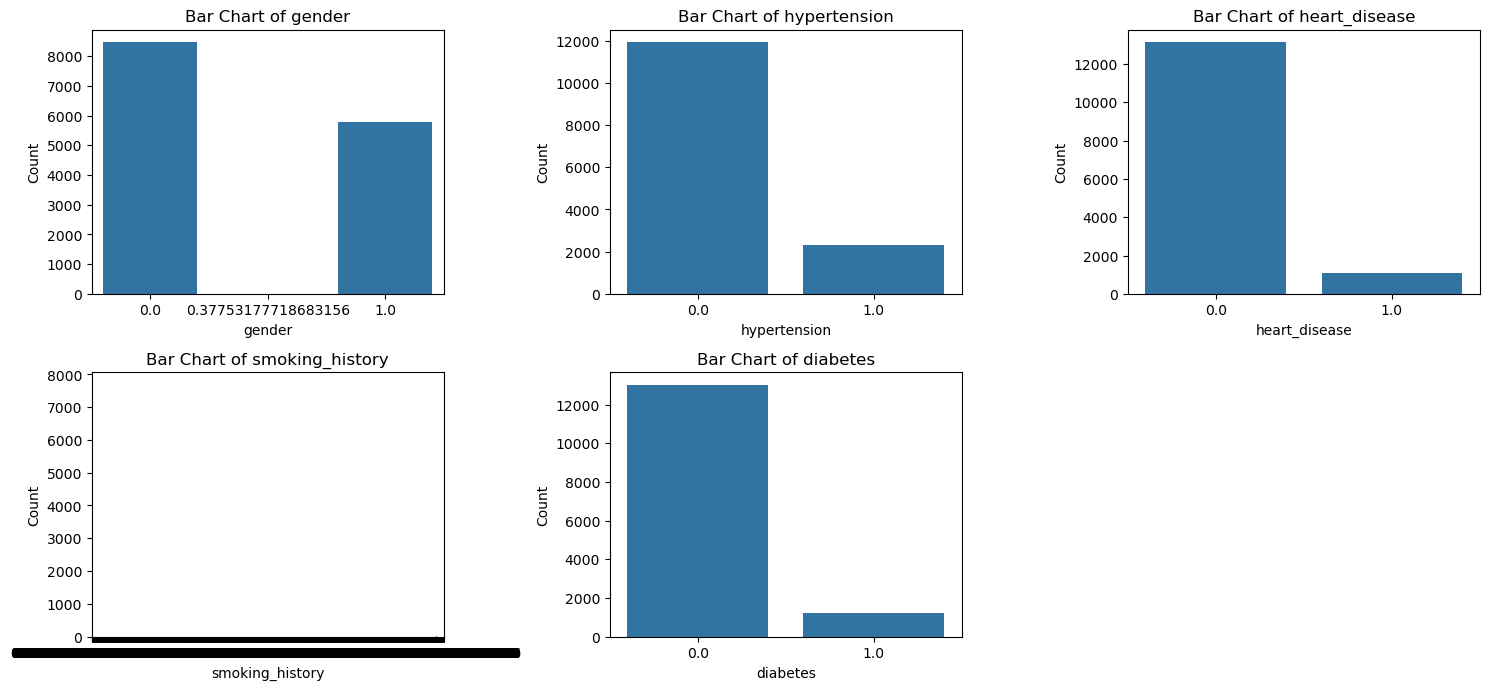

In [34]:
categorical_cols = df_combined.select_dtypes(include=['category', 'object']).columns

plt.figure(figsize=(15, 10))

for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=df_combined[col])
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

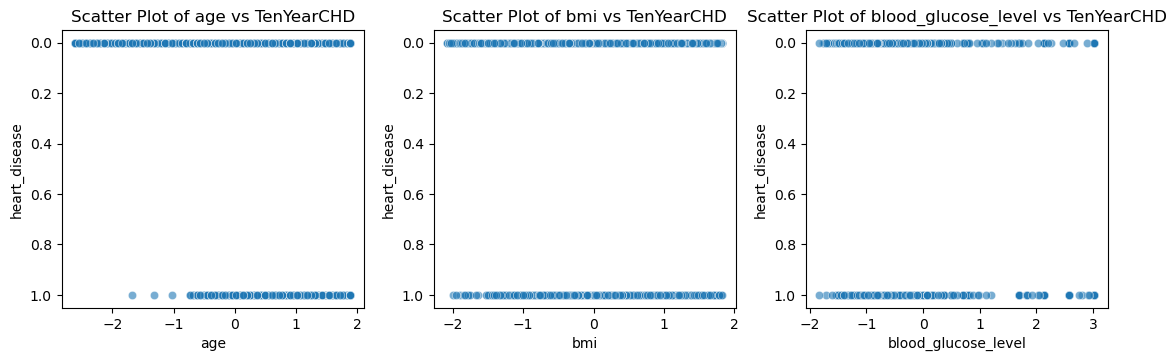

In [35]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_combined.select_dtypes(include=['float64', 'int64']).columns):
    if col != 'heart_disease':
        plt.subplot(3, 4, i + 1)
        sns.scatterplot(x=df_combined[col], y=df_combined['heart_disease'], alpha=0.6)
        plt.title(f'Scatter Plot of {col} vs TenYearCHD')
        plt.xlabel(col)
        plt.ylabel('heart_disease')

plt.tight_layout()
plt.show()

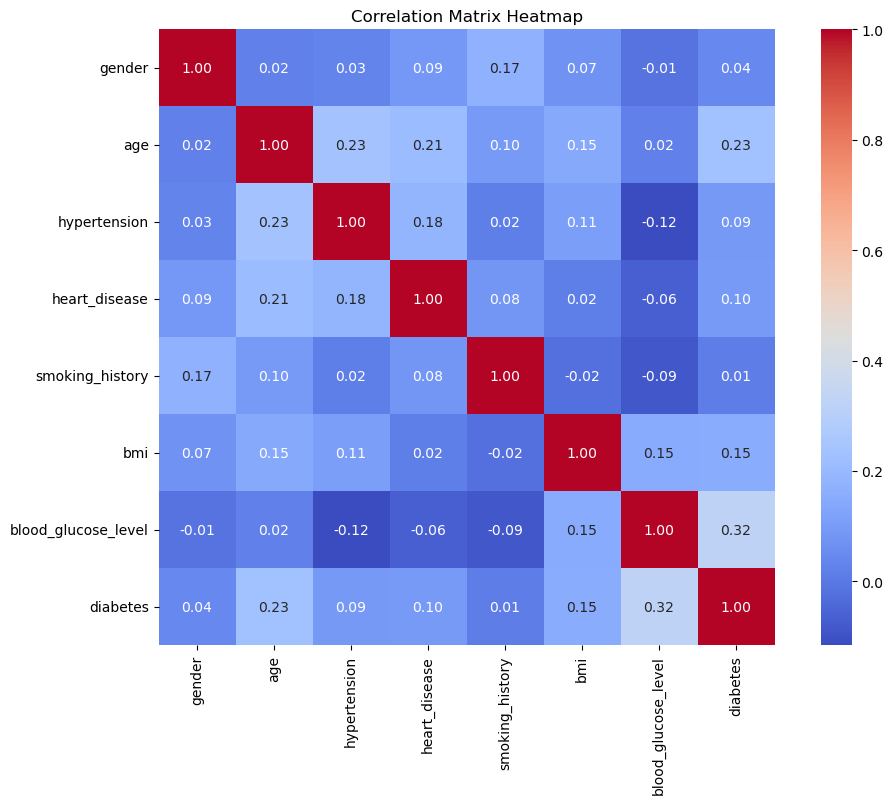

In [36]:
correlation_matrix = df_combined.corr()
# Visualizing the correlation matrix with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

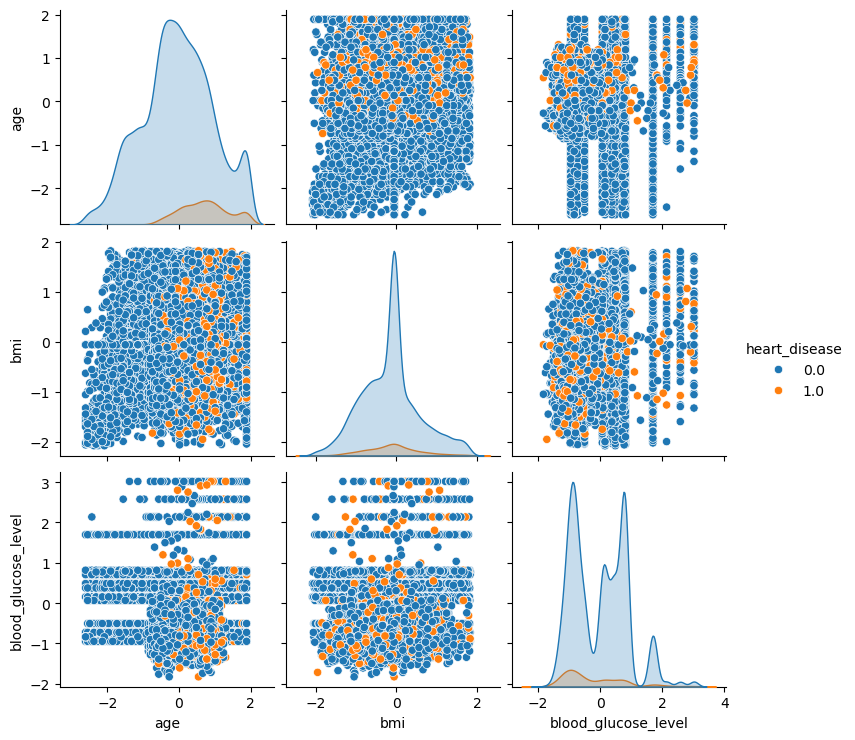

In [37]:
sns.pairplot(df_combined, hue='heart_disease', diag_kind='kde')
plt.show()

# Statistical analysis

In [39]:
df_combined.describe()

,age,bmi,blood_glucose_level
count,14240.000000,14240.000000,14240.000000
mean,0.008560,-0.144859,-0.049346
std,0.988510,0.713792,0.899088
min,-2.607867,-2.079160,-1.832796
25%,-0.622095,-0.615476,-0.840296
50%,0.020360,-0.059310,0.063981
75%,0.721221,0.187135,0.703592
max,1.889322,1.828993,3.019424


# Handling Class Imbalance

In [41]:
from imblearn.over_sampling import SMOTE

X = df_combined.drop('heart_disease', axis=1)  # Features
y = df_combined['heart_disease']  # Target variable

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

print("Before SMOTE class distribution in y_train:")
print(y.value_counts())
print("\nAfter SMOTE class distribution in y_train_res:")
print(y_smote.value_counts())
df_combined = X_smote
df_combined["heart_disease"] = y_smote

Before SMOTE class distribution in y_train:
heart_disease
0.0    13137
1.0     1103
Name: count, dtype: int64

After SMOTE class distribution in y_train_res:
heart_disease
0.0    13137
1.0    13137
Name: count, dtype: int64


In [42]:
df_combined.dropna(inplace = True)

In [43]:
df_combined["heart_disease"].value_counts()

heart_disease
0.0    13137
1.0    11188
Name: count, dtype: int64

In [44]:
categorical_columns = ['gender', 'hypertension', 'smoking_history', 'diabetes', 'heart_disease']

# Convert the data type of the specified columns to int
df_combined[categorical_columns] = df_combined[categorical_columns].astype(int)

In [72]:
df_combined.to_csv("final_df.csv")

# Model Development

In [46]:
from sklearn.model_selection import train_test_split
X = df_combined.drop("heart_disease", axis = 1)
y = df_combined["heart_disease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [47]:
X_train.isnull().sum()

gender                 0
age                    0
hypertension           0
smoking_history        0
bmi                    0
blood_glucose_level    0
diabetes               0
dtype: int64

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91      2627
           1       0.88      0.92      0.90      2238

    accuracy                           0.91      4865
   macro avg       0.91      0.91      0.91      4865
weighted avg       0.91      0.91      0.91      4865

Confusion Matrix:
 [[2358  269]
 [ 173 2065]]
ROC AUC Score: 0.9707966660917612


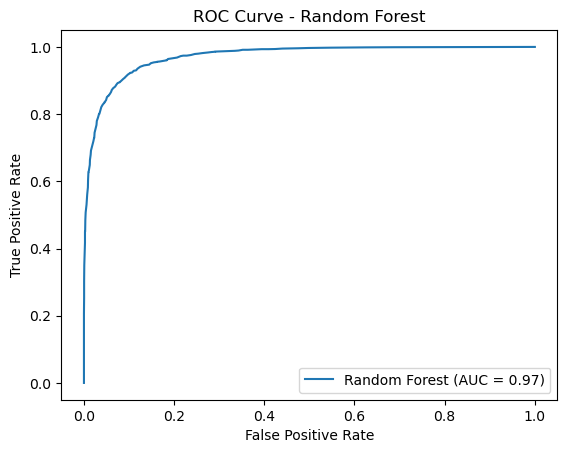

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize Random Forest
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
rf_preds = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Random Forest Classification Report:\n", classification_report(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))
print("ROC AUC Score:", roc_auc_score(y_test, rf_probs))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf_probs)
plt.plot(fpr, tpr, label="Random Forest (AUC = {:.2f})".format(roc_auc_score(y_test, rf_probs)))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


In [50]:
import joblib
joblib.dump(rf_model, 'models/rf_model1.pkl')

['models/rf_model1.pkl']

In [52]:
len(X_train)

19460

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91      2627
           1       0.90      0.89      0.89      2238

    accuracy                           0.90      4865
   macro avg       0.90      0.90      0.90      4865
weighted avg       0.90      0.90      0.90      4865

Confusion Matrix:
 [[2408  219]
 [ 248 1990]]
ROC AUC Score: 0.9699512316757342


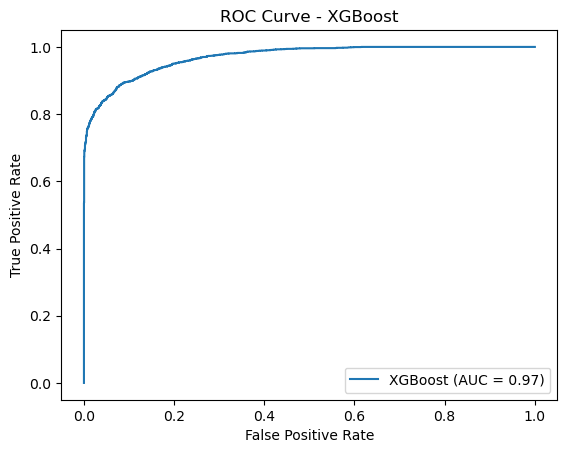

In [54]:
from xgboost import XGBClassifier

# Initialize XGBoost
xgb_model = XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions
xgb_preds = xgb_model.predict(X_test)
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_preds))
print("ROC AUC Score:", roc_auc_score(y_test, xgb_probs))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, xgb_probs)
plt.plot(fpr, tpr, label="XGBoost (AUC = {:.2f})".format(roc_auc_score(y_test, xgb_probs)))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.show()


In [55]:
joblib.dump(xgb_model, 'models/xgb_model.pkl')

['models/xgb_model.pkl']

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84      2627
           1       0.79      0.88      0.83      2238

    accuracy                           0.84      4865
   macro avg       0.84      0.84      0.84      4865
weighted avg       0.84      0.84      0.84      4865

Confusion Matrix:
 [[2104  523]
 [ 272 1966]]
ROC AUC Score: 0.9215377160190814


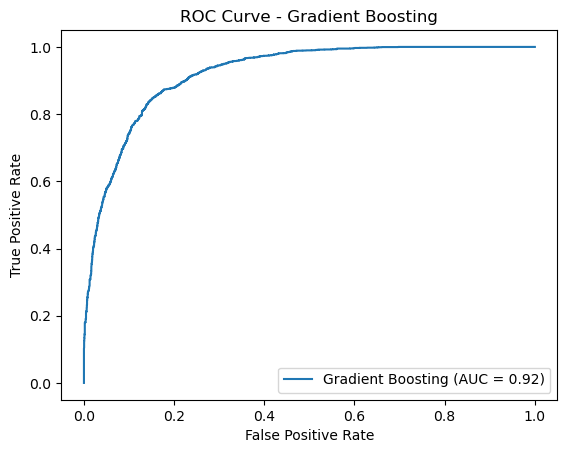

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predictions
gb_preds = gb_model.predict(X_test)
gb_probs = gb_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Gradient Boosting Classification Report:\n", classification_report(y_test, gb_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_preds))
print("ROC AUC Score:", roc_auc_score(y_test, gb_probs))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, gb_probs)
plt.plot(fpr, tpr, label="Gradient Boosting (AUC = {:.2f})".format(roc_auc_score(y_test, gb_probs)))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting")
plt.legend()
plt.show()


In [57]:
joblib.dump(gb_model, 'models/gb_model.pkl')

['models/gb_model.pkl']

In [60]:
# Random Forest Feature Importance
rf_importances = rf_model.feature_importances_
rf_features = pd.DataFrame({'Feature': X.columns, 'Importance': rf_importances}).sort_values(by='Importance', ascending=False)

# XGBoost Feature Importance
xgb_importances = xgb_model.feature_importances_
xgb_features = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_importances}).sort_values(by='Importance', ascending=False)


gb_importances = gb_model.feature_importances_
gb_features = pd.DataFrame({'Feature': X.columns, 'Importance': gb_importances}).sort_values(by='Importance', ascending=False)
# Display the top features
print("Random Forest Feature Importance:\n", rf_features.head())
print("XGBoost Feature Importance:\n", xgb_features.head())
print("Gradient boosting Feature Importance:\n", gb_features.head())

Random Forest Feature Importance:
                Feature  Importance
1                  age    0.369860
5  blood_glucose_level    0.283564
4                  bmi    0.219478
2         hypertension    0.057898
3      smoking_history    0.029327
XGBoost Feature Importance:
                Feature  Importance
1                  age    0.260640
2         hypertension    0.169012
5  blood_glucose_level    0.156468
6             diabetes    0.132377
3      smoking_history    0.113818
Gradient boosting Feature Importance:
                Feature  Importance
1                  age    0.545981
5  blood_glucose_level    0.285038
2         hypertension    0.054643
3      smoking_history    0.040204
4                  bmi    0.037063


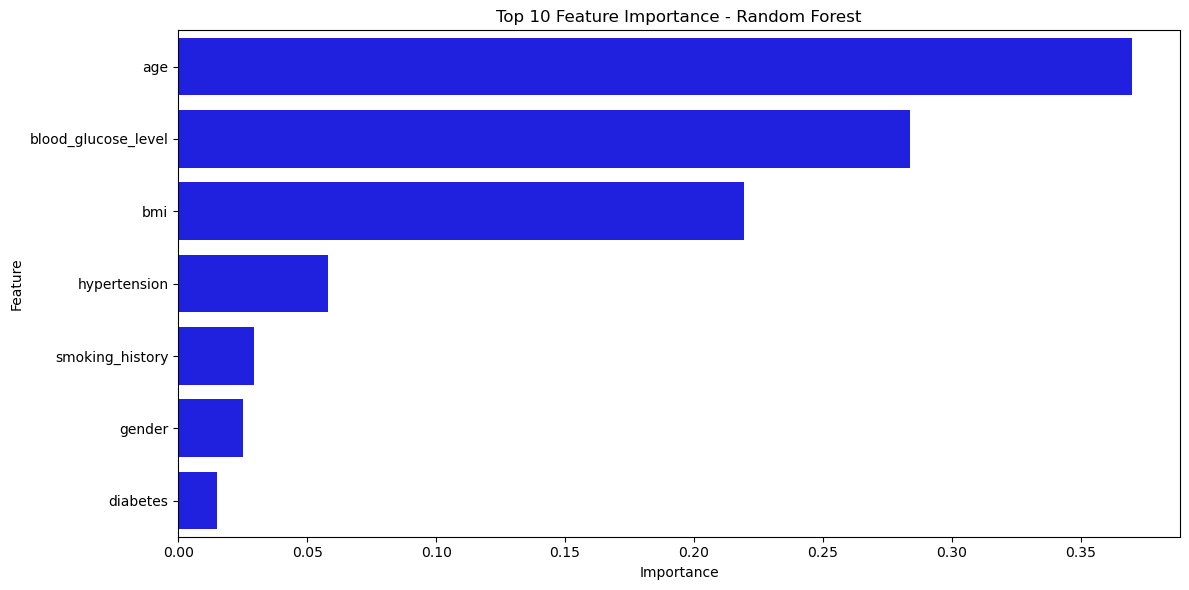

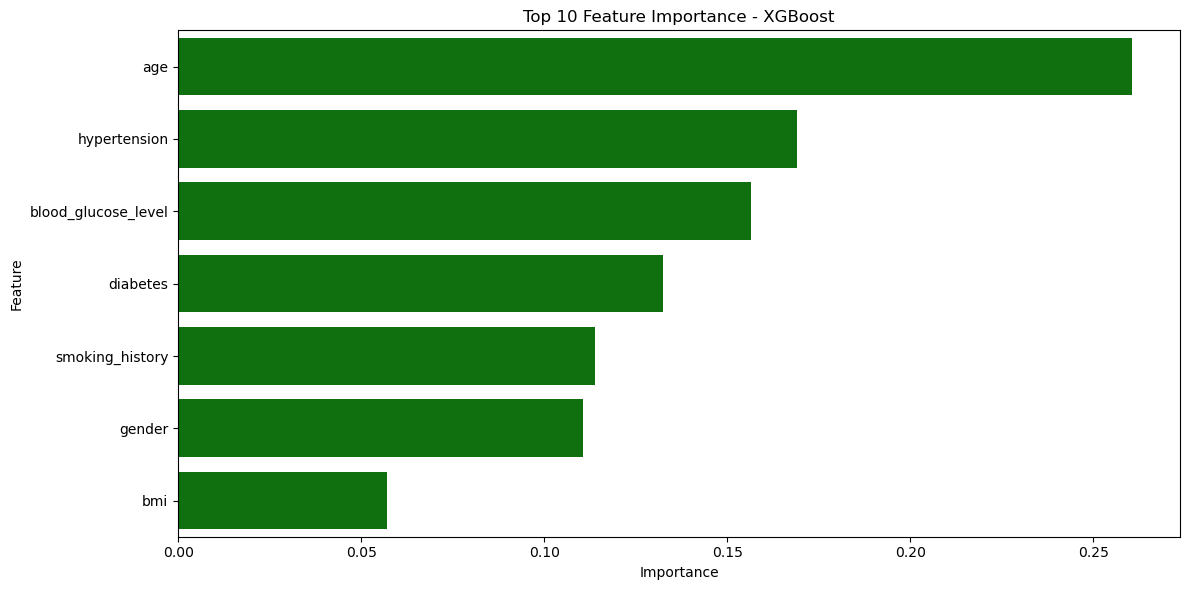

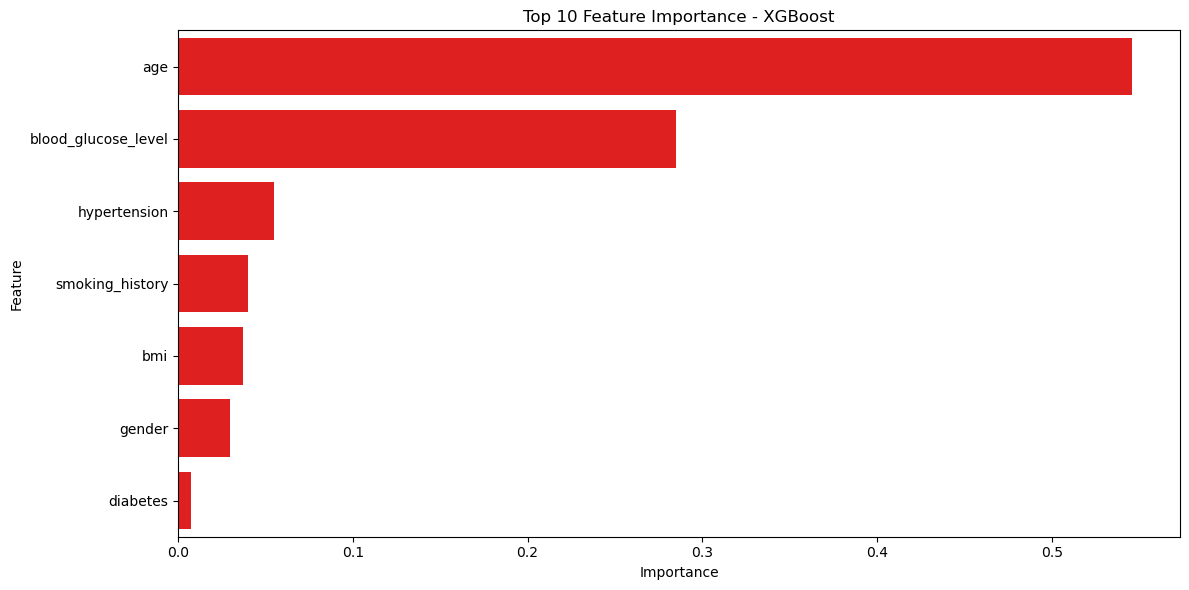

In [61]:
# Plot for Random Forest Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=rf_features.head(10), color='blue')
plt.title('Top 10 Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Plot for XGBoost Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_features.head(10), color='green')
plt.title('Top 10 Feature Importance - XGBoost')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Plot for XGBoost Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data= gb_features.head(10), color='red')
plt.title('Top 10 Feature Importance - XGBoost')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [62]:
from sklearn.model_selection import cross_val_score

# Random Forest Cross-Validation
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='roc_auc')
print("Random Forest Cross-Validation AUC Scores:", rf_cv_scores)
print("Mean AUC Score:", rf_cv_scores.mean())

# XGBoost Cross-Validation
xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='roc_auc')
print("XGBoost Cross-Validation AUC Scores:", xgb_cv_scores)
print("Mean AUC Score:", xgb_cv_scores.mean())

gb_cv_scores = cross_val_score(gb_model, X, y, cv=5, scoring='roc_auc')
print("XGBoost Cross-Validation AUC Scores:", gb_cv_scores)
print("Mean AUC Score:", gb_cv_scores.mean())

Random Forest Cross-Validation AUC Scores: [0.96772449 0.98749249 0.9854662  0.97802184 0.91319753]
Mean AUC Score: 0.9663805091198474
XGBoost Cross-Validation AUC Scores: [0.94807497 0.99377775 0.99190523 0.98524521 0.92343927]
Mean AUC Score: 0.9684884842645941
XGBoost Cross-Validation AUC Scores: [0.92055111 0.96536041 0.95780822 0.92603468 0.69571417]
Mean AUC Score: 0.8930937161473302
